In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
diam = pd.read_csv('../cleaned-data/01-diamonds-train-cl.csv')
diam_test = pd.read_csv('../cleaned-data/01-diamonds-test-cl.csv')

In [3]:
display(diam.head())
diam.describe()
print(diam.shape, diam_test.shape)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.78,3,5,0,61.5,58.0,5.93,5.98,3.66,3446
1,1,0.31,4,7,1,60.8,56.0,4.37,4.32,2.64,732
2,2,0.30,4,5,1,62.3,54.0,4.30,4.34,2.69,475
3,3,1.04,4,6,2,62.0,58.0,6.54,6.46,4.03,9552
4,4,0.65,4,1,1,61.4,55.0,5.58,5.62,3.44,1276


(40345, 11) (13449, 10)


In [4]:
diam_corr = diam.corr()
diam_corr

,id,carat,cut,color,clarity,depth,table,x,y,z,price
id,1.000000,0.001804,-0.002551,0.001494,-0.002441,-0.003035,0.004436,0.003238,0.002021,0.002507,0.001823
carat,0.001804,1.000000,-0.132754,-0.291382,-0.040854,0.023118,0.181725,0.976267,0.945757,0.968685,0.922345
cut,-0.002551,-0.132754,1.000000,0.018865,0.040908,-0.213022,-0.432025,-0.124552,-0.119245,-0.149094,-0.053086
color,0.001494,-0.291382,0.018865,1.000000,0.011880,-0.044171,-0.026576,-0.270998,-0.262095,-0.273173,-0.173932
clarity,-0.002441,-0.040854,0.040908,0.011880,1.000000,-0.004216,-0.032344,-0.060480,-0.060030,-0.061368,-0.040825
depth,-0.003035,0.023118,-0.213022,-0.044171,-0.004216,1.000000,-0.299534,-0.028765,-0.032894,0.092482,-0.013307
table,0.004436,0.181725,-0.432025,-0.026576,-0.032344,-0.299534,1.000000,0.195775,0.182559,0.154399,0.126545
x,0.003238,0.976267,-0.124552,-0.270998,-0.060480,-0.028765,0.195775,1.000000,0.967143,0.985385,0.886168
y,0.002021,0.945757,-0.119245,-0.262095,-0.060030,-0.032894,0.182559,0.967143,1.000000,0.960350,0.860499
z,0.002507,0.968685,-0.149094,-0.273173,-0.061368,0.092482,0.154399,0.985385,0.960350,1.000000,0.876061


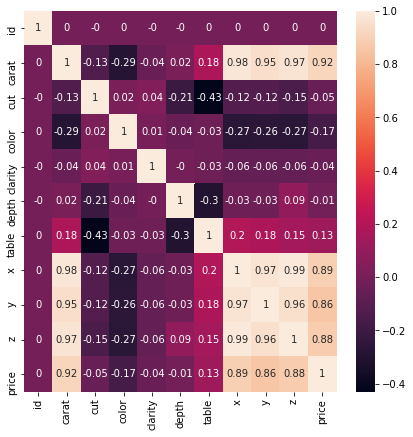

In [5]:
plt.figure(figsize=(7,7))
sns.heatmap(round(diam_corr,2), annot=True)

So a good first step would be to get rid of the x,y,z variables, since they have a very strong correlation among themselves, and with carat (i.e. weight)

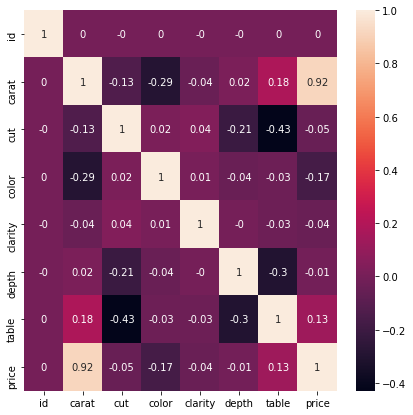

In [6]:
diam_red = diam.drop(columns=['x','y', 'z'])
diam_red_corr = diam_red.corr()
plt.figure(figsize=(7,7))
sns.heatmap(round(diam_red_corr,2), annot=True)

## Splitting the data

Another idea, is to split the dataset in two. We can see from the following price-distribution, that there are at least two groups of diamonds.

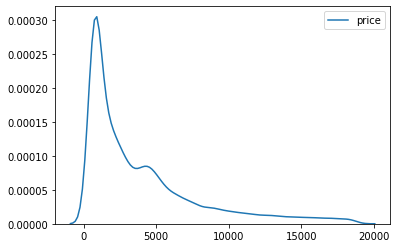

In [7]:
sns.kdeplot(diam.price)

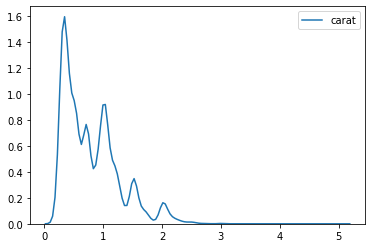

In [8]:
sns.kdeplot(diam.carat)

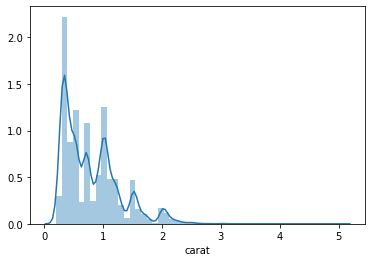

In [9]:
sns.distplot(diam.carat)

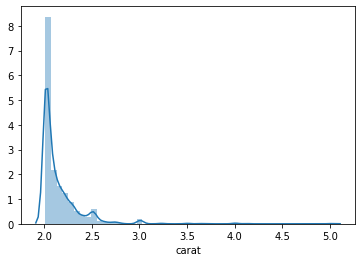

In [10]:
sns.distplot(diam.carat[diam.carat > 2])

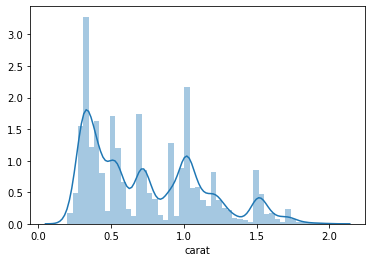

In [11]:
sns.distplot(diam.carat[diam.carat < 2])

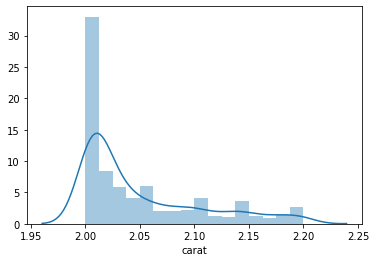

In [12]:
sns.distplot(diam.loc[(diam.carat >= 2) & (diam.carat <= 2.2)].carat)

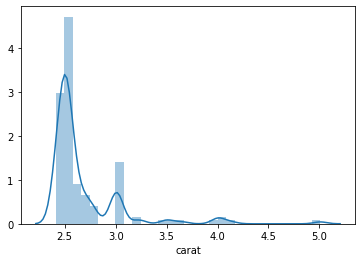

In [13]:
sns.distplot(diam.carat.loc[diam.carat > 2.4])

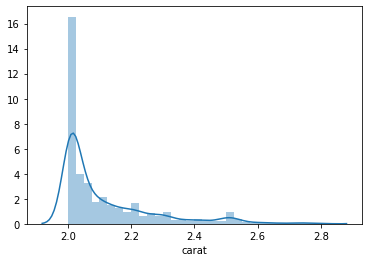

In [14]:
sns.distplot(diam.loc[(diam.carat >= 2.0) & (diam.carat <= 2.8)].carat)

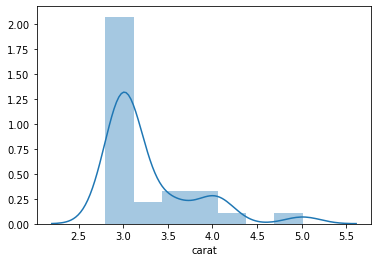

In [15]:
sns.distplot(diam.loc[(diam.carat >= 2.8) & (diam.carat <= 900)].carat)

A first idea would be to divide in two - below or equal 2 carats, and above two carats.

In [16]:
def splitFrame(df):
    df = df.drop(columns=['x','y','z'])
    dflow = df.loc[df.carat < 2.0]
    dfhigh = df.loc[df.carat >= 2.0]
    return dflow, dfhigh


train_low, train_high = splitFrame(diam)
test_low, test_high = splitFrame(diam_test)

In [17]:
train_low

,id,carat,cut,color,clarity,depth,table,price
0,0,0.78,3,5,0,61.5,58.0,3446
1,1,0.31,4,7,1,60.8,56.0,732
2,2,0.30,4,5,1,62.3,54.0,475
3,3,1.04,4,6,2,62.0,58.0,9552
4,4,0.65,4,1,1,61.4,55.0,1276
...,...,...,...,...,...,...,...,...
40340,40340,0.50,4,6,0,61.9,56.0,1716
40341,40341,0.33,4,7,4,61.8,56.0,781
40342,40342,0.40,3,4,6,61.5,58.0,1123
40343,40343,1.06,4,2,0,61.2,57.0,5651


In [18]:
for e,i in zip([train_low, train_high, test_low, test_high], ["train_low", "train_high", "test_low", "test_high"]):
    e.to_csv(f'../cleaned-data/03-{i}.csv', index=False)